In [29]:
from pyDOE2 import *
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
parameters = ["Mg-glutamate", "k-glutamate", "Sodium oxalate", "3-PGA", "NTP", "NAD", "Folinic acid", "Spermidine", "tRNA", "Amino acids", "Extract", "DNA", "HEPES"]

In [31]:
n_parameters = len(parameters)
n_samples = 100
parameters_ratios = [0, 0.1, 0.3, 0.5, 1]
n_ratios = len(parameters_ratios)

In [32]:
sampling = lhs(n_parameters, samples=n_samples)

0 0.2 0.4 0.6000000000000001 1.0


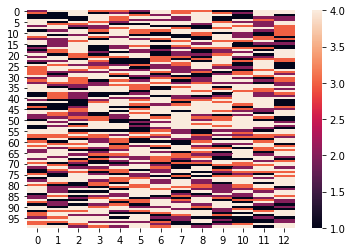

[[2, 4, 4, 3, 3, 2, 4, 3, 3, 1, 1, 4, 4],
 [3, 1, 4, 1, 2, 1, 4, 3, 4, 3, 2, 4, 4],
 [1, 1, 4, 4, 4, 3, 2, 4, 4, 4, 1, 4, 1],
 [1, 1, 1, 4, 3, 4, 4, 2, 4, 1, 1, 2, 2],
 [4, 4, 1, 4, 3, 2, 2, 2, 4, 1, 4, 3, 2],
 [4, 1, 4, 3, 2, 4, 4, 4, 4, 3, 2, 2, 4],
 [4, 3, 3, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4],
 [2, 4, 2, 2, 4, 4, 1, 1, 1, 4, 3, 2, 3],
 [4, 4, 1, 2, 3, 4, 4, 3, 1, 3, 4, 4, 3],
 [1, 2, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 3],
 [4, 4, 4, 1, 4, 3, 1, 4, 3, 1, 2, 1, 3],
 [4, 1, 2, 4, 4, 1, 1, 1, 3, 4, 2, 1, 3],
 [3, 4, 4, 3, 2, 4, 4, 1, 1, 4, 2, 3, 1],
 [2, 2, 4, 1, 4, 2, 3, 4, 1, 4, 4, 3, 3],
 [4, 2, 3, 4, 4, 4, 1, 3, 4, 3, 3, 4, 1],
 [4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 1, 2, 2],
 [1, 2, 4, 1, 2, 3, 1, 3, 4, 4, 1, 1, 1],
 [2, 4, 4, 1, 2, 4, 1, 2, 3, 3, 3, 3, 1],
 [1, 3, 4, 1, 4, 2, 2, 4, 1, 2, 4, 1, 4],
 [2, 3, 4, 2, 1, 2, 1, 2, 1, 2, 2, 4, 4],
 [4, 1, 3, 1, 4, 4, 1, 2, 2, 3, 4, 1, 4],
 [2, 4, 3, 3, 3, 4, 3, 3, 1, 4, 2, 2, 4],
 [4, 4, 1, 4, 1, 1, 3, 1, 3, 4, 1, 3, 3],
 [2, 2, 4, 3, 1, 1, 3, 4, 1, 4, 3,

In [36]:
ratios = (1 / n_ratios)

ratio_1 = 0
ratio_2 = ratios*1
ratio_3 = ratio_2*2
ratio_4 = ratio_2*3
ratio_5 = ratio_2*5

ratios_array = []

for experiment in sampling:
    new_experiment = []
    
    for element in experiment:
        
        if element==ratio_1:
            new_experiment.append(0)
            continue
        
        if element > ratio_1 and element <= ratio_2:
            new_experiment.append(1)
            continue
        
        if element > ratio_2 and element <= ratio_3:
            new_experiment.append(2)
            continue
        
        if element > ratio_3 and element <= ratio_4:
            new_experiment.append(3)
            continue
            
        if element > ratio_4 and element <= ratio_5:
            new_experiment.append(4)
            continue
    
    ratios_array.append(new_experiment)

sns.heatmap(ratios_array)
plt.show()
ratios_array

In [38]:
media = ratios_array
hum_varmed = parameters

max_VER_factor = 2.5
batch_vol = 800
VER_allocated_volume = batch_vol / max_VER_factor

# levels for concentrations in medium
vols = [10.4, 355, 2.1, 30, 1.5, 30, 0.2, 1.3, 2, 0.5, 10, 50, 30] 

human_readable = ""
for j in range(len(media)):
    
    remaining_vol = VER_allocated_volume
    
    human_readable += str(j+1) + ","
    medium = media[j]
    for i in range(len(medium)):
        conc = medium[i]
        if conc != 0.0:
            
            comp = hum_varmed[i]
            
            vol = vols[conc-1]
            
            human_readable += comp + ": " + str(vol) + ","
            
            remaining_vol -= vol
            
    human_readable += "Water: " + str(int(remaining_vol))
    human_readable += '\n'
    
with open("compositions_test.csv", 'w') as f:
    f.write(human_readable)

In [39]:
# Saving output in csv file
headers = "Mg-glutamate; k-glutamate; Sodium oxalate; 3-PGA; NTP; NAD; Folinic acid; Spermidine; tRNA; Amino acids; Extract; DNA; HEPES"
np.savetxt("initial_plate.csv", ratios_array, delimiter=";", header = headers, fmt='%.5f')